In [1]:
!wget https://storage.googleapis.com/qwasar-public/track-ds/boston.csv
!pip install seaborn
!pip install sklearn

--2022-08-22 03:49:57--  https://storage.googleapis.com/qwasar-public/track-ds/boston.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.73.128, 173.194.222.128, 173.194.221.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.73.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39168 (38K) [text/csv]
Saving to: ‘boston.csv.3’

boston.csv.3        100%[===================>]  38.25K  --.-KB/s    in 0.001s  

2022-08-22 03:49:57 (48.1 MB/s) - ‘boston.csv.3’ saved [39168/39168]

     |████████████████████████████████| 292 kB 5.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 22.2 MB 1.9 MB/s            
     |████████████████████████████████| 306 kB 38.1 MB/s            
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import sklearn 
from sklearn.linear_model import LinearRegression



In [4]:
def load_dataset():
	return pd.read_csv("boston.csv")

boston_dataframe = load_dataset()

In [5]:
def print_summarize_dataset(dataset):
   print("Dataset dimension:")
   print(boston_dataframe.shape)
   print("First 10 rows of dataset:")
   print(boston_dataframe.head(10))
   print("Statistical summary:")
   print(boston_dataframe.describe)
print_summarize_dataset(boston_dataframe)   



Dataset dimension:
(506, 14)
First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  3

In [6]:
def clean_dataset(boston_dataframe):
  return boston_dataframe.dropna()

clean_dataset = clean_dataset(boston_dataframe)

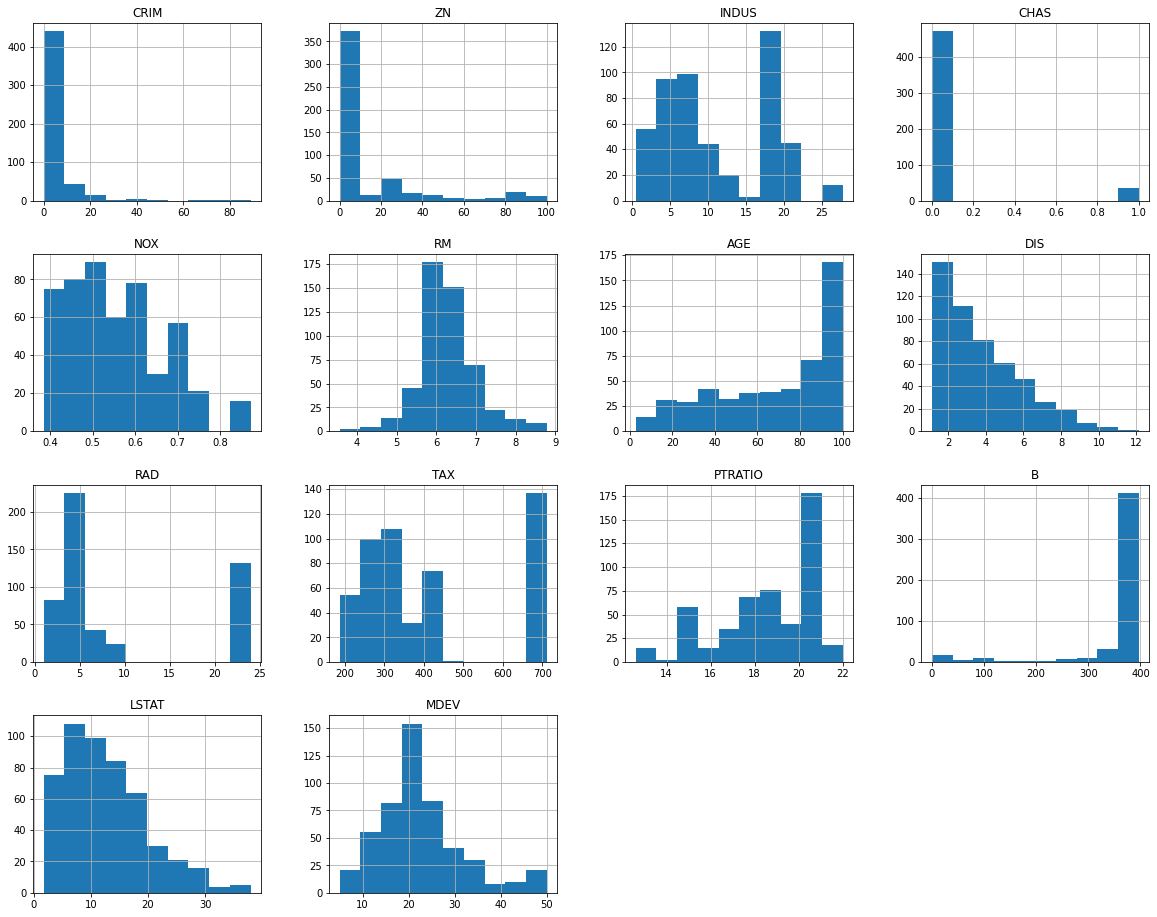

In [7]:
def print_histograms(boston_dataframe):
  boston_dataframe.hist(figsize=(20, 16))
  plt.show()
print_histograms(boston_dataframe)

In [8]:
def compute_correlations_matrix(dataset):
    correlation = dataset.corr()
    plt.figure(figsize=(15,15))
    sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap="Greens")
    plt.show()
    return correlation


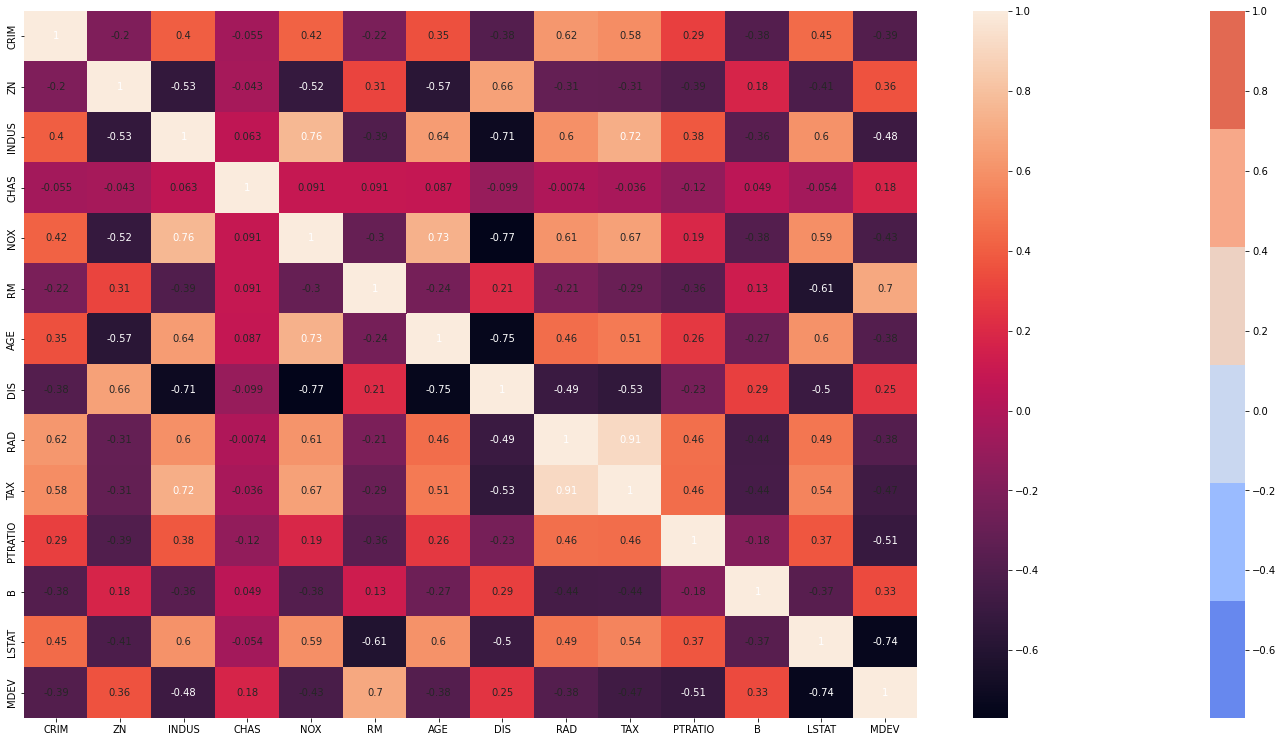

In [9]:
def compute_correlations_matrix(boston_dataframe):
  data=boston_dataframe.corr()
  colormap = sns.color_palette("coolwarm")
  plt.figure(figsize=(25,13))
  ax = sns.heatmap(data, cmap=colormap, annot=True)
  sns.heatmap(data)
  plt.show()
	
  
compute_correlations_matrix(clean_dataset)


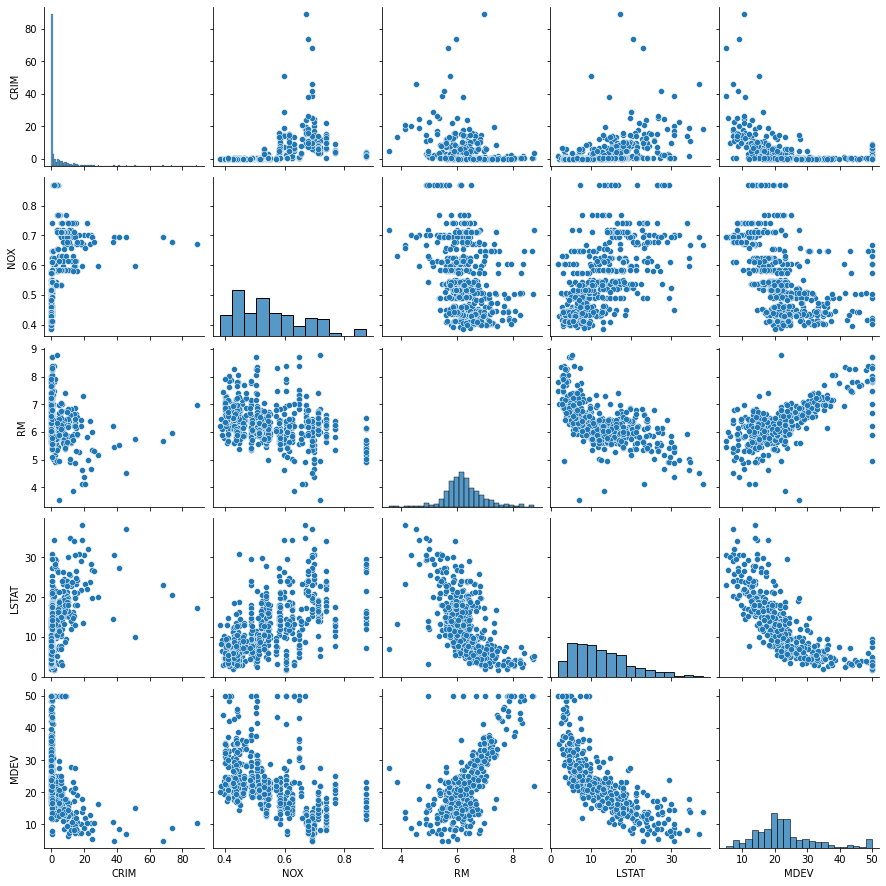

In [10]:
def print_scatter_matrix(boston_dataframe):
  sns.pairplot(boston_dataframe[["CRIM","NOX","RM","LSTAT","MDEV"]])
  plt.show()

print_scatter_matrix(boston_dataframe)

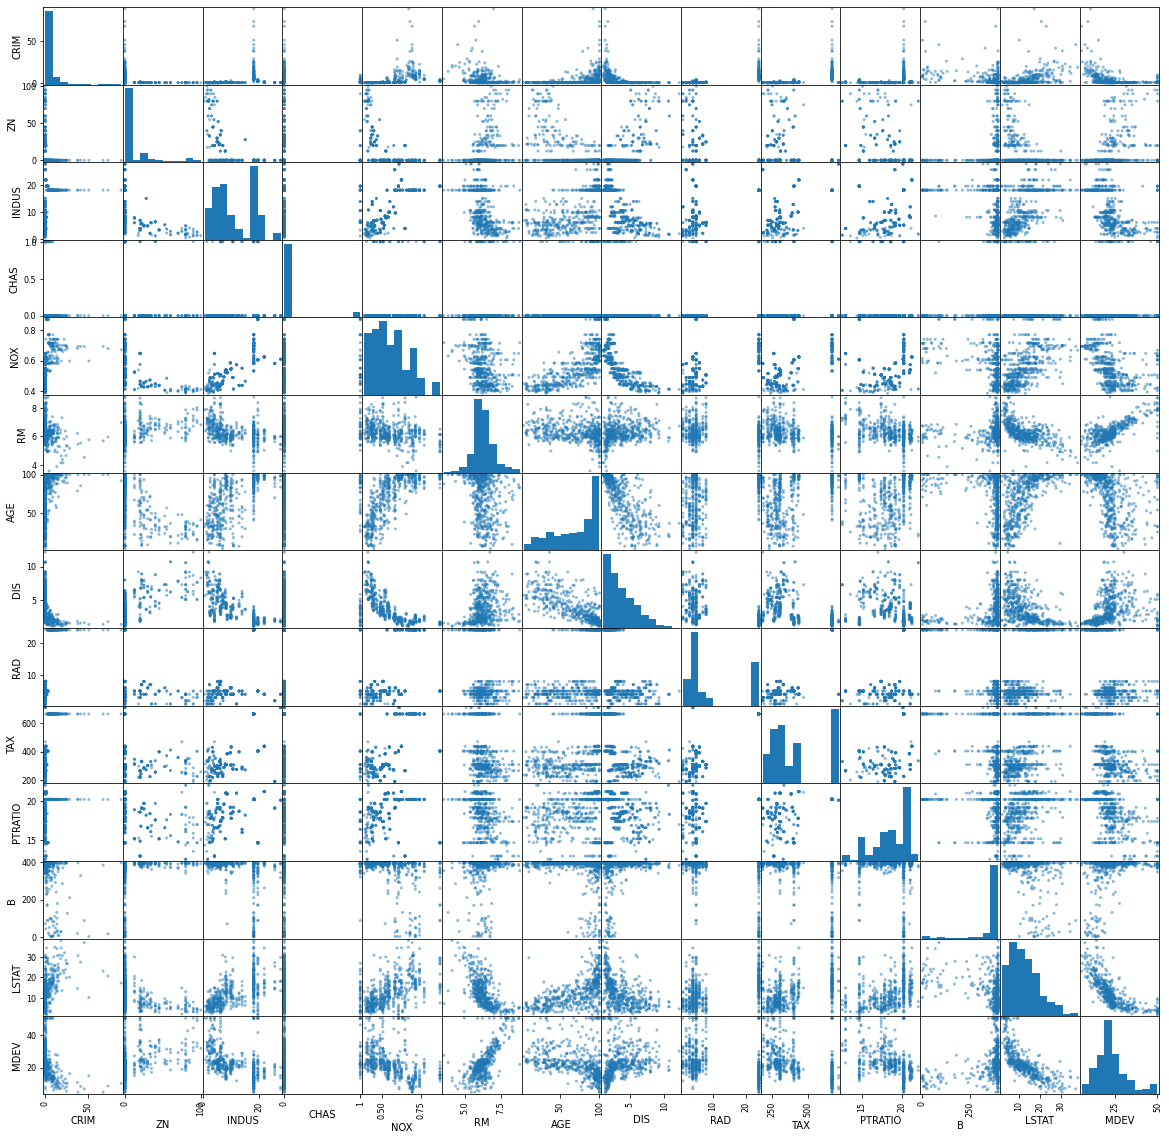

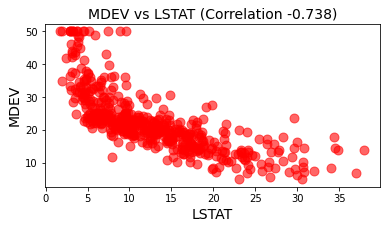

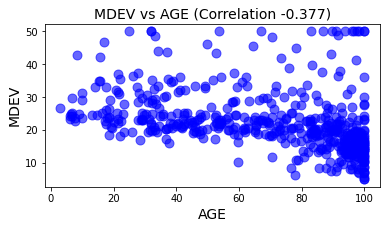

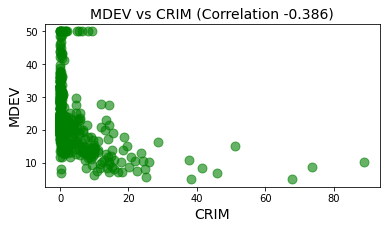

In [11]:
def print_scatter_matrix(boston_dataframe):
  scatter_matrix(boston_dataframe, figsize = (20,20))
  plt.show()

  mdev_lstat_corr = round(boston_dataframe['LSTAT'].corr(boston_dataframe['MDEV']), 3)
  plt.figure(figsize=(6, 3))
  plt.scatter(x=boston_dataframe['LSTAT'], y=boston_dataframe['MDEV'], alpha=0.6, s=80, color='red')
  plt.title(f'MDEV vs LSTAT (Correlation {mdev_lstat_corr})', fontsize=14)
  plt.xlabel('LSTAT', fontsize=14)
  plt.ylabel('MDEV', fontsize=14)
  plt.show()

  mdev_age_corr = round(boston_dataframe['AGE'].corr(boston_dataframe['MDEV']), 3)
  plt.figure(figsize=(6, 3))
  plt.scatter(x=boston_dataframe['AGE'], y=boston_dataframe['MDEV'], alpha=0.6, s=80, color='blue')
  plt.title(f'MDEV vs AGE (Correlation {mdev_age_corr})', fontsize=14)
  plt.xlabel('AGE', fontsize=14)
  plt.ylabel('MDEV', fontsize=14)
  plt.show()
    
  mdev_crim_corr = round(boston_dataframe['CRIM'].corr(boston_dataframe['MDEV']), 3)
  plt.figure(figsize=(6, 3))
  plt.scatter(x=boston_dataframe['CRIM'], y=boston_dataframe['MDEV'], alpha=0.6, s=80, color='green')
  plt.title(f'MDEV vs CRIM (Correlation {mdev_crim_corr})', fontsize=14)
  plt.xlabel('CRIM', fontsize=14)
  plt.ylabel('MDEV', fontsize=14)
  plt.show()

print_scatter_matrix(clean_dataset)

In [12]:
def boston_fit_model(boston_dataframe):
  # SELECT two columns from our 
  model_dataset = boston_dataframe[["RM","MDEV"]]
  regressor = sklearn.linear_model.LinearRegression()
  # Extract column 1
  x = model_dataset.iloc[:, :-1].values
  # Extract column 2
  y = model_dataset.iloc[:, 1].values
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=2)
  # Train the model
  regressor.fit(x_train, y_train)
  return regressor

print(boston_fit_model(boston_dataframe=boston_dataframe))

LinearRegression()


In [13]:
def boston_predict(estimator, array_to_predict):
  result = estimator.predict(array_to_predict)
  return result

In [14]:
def compute_correlations_matrix(dataset):
    correlation = dataset.corr()
    plt.figure(figsize=(15,15))
    sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap="Greens")
    plt.show()
    return correlation
